Assignment 1 Part - 3.1 using SKLearn Library

In [1]:
#Download All Necessary Python Package required for K Means Clustering
import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.cm as cm

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [5]:
#Load MNIST data from tensorflow datasets
(x, _), (_, _) = mnist.load_data()

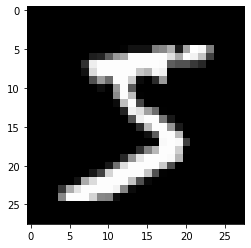

In [6]:
#Visualize One Image only
plt.imshow(x[0,:,:],cmap=plt.cm.gray)

In [5]:
# Print shape of dataset
print("Training: ",x.shape)
# Print type of Data
print("Type of Data:", type(x))

Training:  (60000, 28, 28)
Type of Data: <class 'numpy.ndarray'>


In [6]:
# Reshape the dataset from (60000, 28, 28) to (60000, 746)
x=x.reshape(60000,28*28)
print(x.shape)

(60000, 784)


In [7]:
#Normalize Image Pixel value by dividing 255. So variance would be between 0.0 to 1.0
x = x.astype(np.float32) / 255.

In [8]:
#Checking Maximum Vale
print(np.amax(x[0,:]))

1.0


In [9]:
# Took only 30000 images out of 60000 as my laptop is not able to run on 60000, taking infinite time and heating
z = x[0:30000,:]

In [10]:
# Now implement K means clustering on MNIST Datasets for range of cluster from 2 to 30
k_max = 20 # Maximum value of Clusters
k_init = 2 # Minimum Value of Clusters

inertia_list = [] # List of J_clust for each number of clusters 
silhouette_list = [] #List of silhouette score for each number of clusters
centroids_list = [] # List of K Nos. Centroids for each number of clusters
silhouette_values_list = []
clusters_labels_list = [] 
y_predict_list = [] # List of group assignment indices for each number of clusters
#clusters_init = 'k-means++' # Initialization of Clusters choses as k-means++

for i in range(k_init, k_max): # iterate over range of clusters and save results in lists
    # Initialize the Random Clusters from MNIST Datasets
    random_indices = np.random.randint(low=0, high=z.shape[0], size=i, dtype=int)
    clusters_init = z[random_indices]
    #Pass the Parameters in MiniBatchKmeans Clustering
    minibatch_kmeans = MiniBatchKMeans(n_clusters=i,init=clusters_init ,max_iter=100,n_init=1)
    minibatch_kmeans.fit(z) # Run the K-means clustering on Mnist Dataset
    
    y_predict_list.append(minibatch_kmeans.predict(z)) # Predcitions of Labels
    # Calculte the J_Cluster / Composite Squared Distance between data points and centroids for all data vectors
    inertia = minibatch_kmeans.inertia_ 
    inertia_list.append(inertia) # Appned the J_Clust of this clusters in List
    # Calculate and save Clusters Centroid in list
    centroids = minibatch_kmeans.cluster_centers_
    centroids_list.append(centroids) 

    print("Number of Cluster :",i)
    print("J_clust / Inertia :",inertia)

Number of Cluster : 2
Inertia : 1493239.0
Silhouette Score : 0.085093334
Number of Cluster : 3
Inertia : 1420653.2
Silhouette Score : 0.05606899
Number of Cluster : 4
Inertia : 1383574.5
Silhouette Score : 0.033774935
Number of Cluster : 5
Inertia : 1341052.4
Silhouette Score : 0.04385327
Number of Cluster : 6
Inertia : 1283043.2
Silhouette Score : 0.06618128
Number of Cluster : 7
Inertia : 1264167.2
Silhouette Score : 0.06620355
Number of Cluster : 8
Inertia : 1256124.8
Silhouette Score : 0.06761251
Number of Cluster : 9
Inertia : 1207876.8
Silhouette Score : 0.05321314
Number of Cluster : 10
Inertia : 1200127.5
Silhouette Score : 0.06541456
Number of Cluster : 11
Inertia : 1182236.2
Silhouette Score : 0.06678278
Number of Cluster : 12
Inertia : 1219460.0
Silhouette Score : 0.049817376
Number of Cluster : 13
Inertia : 1139905.2
Silhouette Score : 0.058979895
Number of Cluster : 14
Inertia : 1140795.9
Silhouette Score : 0.058533985
Number of Cluster : 15
Inertia : 1124496.6
Silhouette 

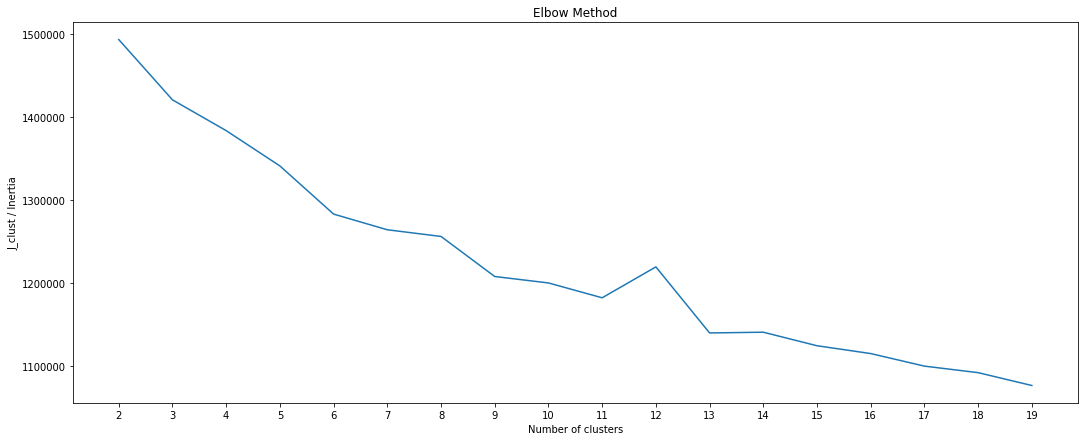

In [17]:
# Now plot the J_Clust / Inertia which a composite squared distance between datapoints and centroids
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(range(k_init, k_max), inertia_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('J_clust / Inertia')
xaxis=np.arange(k_init, k_max, 1, dtype=int)
ax1.set_xticks(xaxis)
plt.show()

In [12]:
#Group_Assignment_Indices for Optimum Clusters
print("Group_Assignment_Indices for Clusters K = 10:")
print("Length of Predictions :", len(y_predict_list[10]))
print(y_predict_list[10][0:100])

Group_Assignment_Indices for Clusters K = 10:
Length of Predictions : 30000
[ 7  6 10 11  5  1 11  7 11  8  4 11  4  1 11  8  2  8  1  8 10  6  8 11
  1  4  5  4  9  1 11  7  1  8  7 11  1  6  5  1 11  7  5  5 11  5  5  7
  5  7  4  0  9 11  9  8  6  8 10 11 10  1  1  6  9 11  1 11  4  6 11  8
 11  1  4  7  4 11 11  8  4  7  2  1  9  7  4  8  0  8  2  8  5  1  8  6
  5  8  4 11]


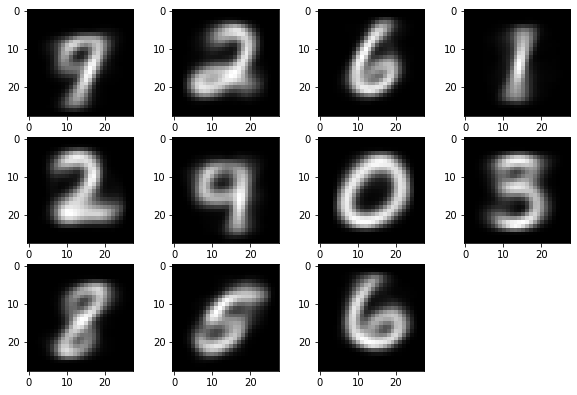

In [25]:
# Dislay the all images of Centroids when K is 10:
centroids = centroids_list[11-k_init]
centroids = centroids.reshape(centroids.shape[0],28,28)
centroids = centroids * 255
plt.figure(figsize = (10,9))
#bottom = 0.35
for i in range(centroids.shape[0]):
# plt.subplots_adjust(bottom)
 plt.subplot(4,4,i+1)
 #plt.title("Number:{}".format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i],cmap=plt.cm.gray)